In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
PATH = "../data/"
df  = pd.read_csv(f'{PATH}train.csv')
df_calender = pd.read_csv(f'{PATH}train_calendar.csv')
df["date"] = pd.to_datetime(df["date"])

In [3]:
df.head(5)

,warehouse,date,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1722.0,32575.0,Prague_1_2020-12-05
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1688.0,32507.0,Prague_1_2020-12-06
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1696.0,32552.0,Prague_1_2020-12-07
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,0,0,0,0.0,0,0.8,0.0,1681.0,32423.0,Prague_1_2020-12-08
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,0,0,0,0.0,0,0.5,0.0,1704.0,32410.0,Prague_1_2020-12-09


In [4]:
df_calender.head(5)

,date,holiday_name,holiday,shutdown,mini_shutdown,warehouse_limited,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,warehouse
0,2022-03-09,NaN,0,0,0,0,0,1,0,0,0.0,0,0.0,0.0,Prague_1
1,2019-07-03,NaN,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,Prague_1
2,2020-05-18,NaN,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,Prague_1
3,2021-11-09,NaN,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,Prague_1
4,2023-08-02,NaN,0,0,0,0,0,0,0,0,0.0,0,2.5,0.0,Prague_1


In [5]:
df.shape

(7340, 18)

In [6]:
print(df.warehouse.nunique())
print(df.query('warehouse == "Prague_1"').shape)
print(df.date.max())
print(df.date.min())

7
(1193, 18)
2024-03-15 00:00:00
2020-12-05 00:00:00


In [7]:

df1 = df.query('warehouse == "Prague_1"')
# assign date as the index and then fill the missing date, create a column to indicate the missing date
df1 = df1.set_index('date').asfreq('D')
df1['missing'] = df1['warehouse'].isnull().astype(int)
df1.head(5)


,warehouse,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id,missing
date,,,,,,,,,,,,,,,,,,
2020-12-05,Prague_1,6895.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1722.0,32575.0,Prague_1_2020-12-05,0
2020-12-06,Prague_1,6584.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1688.0,32507.0,Prague_1_2020-12-06,0
2020-12-07,Prague_1,7030.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1696.0,32552.0,Prague_1_2020-12-07,0
2020-12-08,Prague_1,6550.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0,1681.0,32423.0,Prague_1_2020-12-08,0
2020-12-09,Prague_1,6910.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,1704.0,32410.0,Prague_1_2020-12-09,0


In [8]:
df.query('shutdown == 1')

,warehouse,date,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id
1908,Brno_1,2022-11-22,5133.0,NaN,0,1,0,0,0,0,0,1.0,0,0.0,0.0,2277.0,29525.0,Brno_1_2022-11-22


In [9]:
print(df1.missing.sum())

4


In [10]:
df.warehouse.unique()

array(['Prague_1', 'Brno_1', 'Prague_2', 'Prague_3', 'Munich_1',
       'Frankfurt_1', 'Budapest_1'], dtype=object)

In [11]:

def plot_ts(warehouse, df):
    df1 = df.query('warehouse == "{}"'.format(warehouse))
    # assign date as the index and then fill the missing date, create a column to indicate the missing date
    df1 = df1.set_index('date').asfreq('D')
    df1['missing'] = df1['warehouse'].isnull().astype(int)
    df1.plot(y='orders', figsize=(25, 6))
    mx = df1.orders.max()
    #plot vertical lines for dates of shutdown with red color, mini-shotdown with green color
    shutdown_dates = df1[df1['shutdown'] == 1].index
    print(str(shutdown_dates))
    plt.vlines(shutdown_dates, 0, mx, colors='r', linestyles='solid', label='shutdown') 
    minishutdown_dates = df1[df1['mini_shutdown'] == 1].index
    print(str(minishutdown_dates))
    plt.vlines(minishutdown_dates, 0, mx, colors='orange', linestyles='solid', label='mini_shutdown')   
    # vertical lines for holidays
    holidays = df1.query('holiday == 1').index
    plt.vlines(holidays, 0, mx, colors='m', linestyles='dotted', label='holidays')
    # vertical lines for precipitation
    preceptions = df1.query('precipitation == 1').index
    plt.vlines(preceptions, 0, mx, colors='c', linestyles='dotted', label='precipitation')
    # vertical lines for shops_closed
    shops_closed = df1.query('shops_closed == 1').index
    plt.vlines(shops_closed, 0, mx, colors='g', linestyles='--', label='shops_closed')
    # vertical lines for school_holidays 
    school_holidays = df1.query('school_holidays == 1').index #+ df1.query('winter_school_holidays == 1').index
    plt.vlines(school_holidays, 0, mx, colors='y', linestyles='--', label='school_holidays')
    plt.legend()

    plt.title(warehouse)
    plt.show()



DatetimeIndex([], dtype='datetime64[ns]', name='date', freq='D')
DatetimeIndex(['2022-10-04'], dtype='datetime64[ns]', name='date', freq='D')


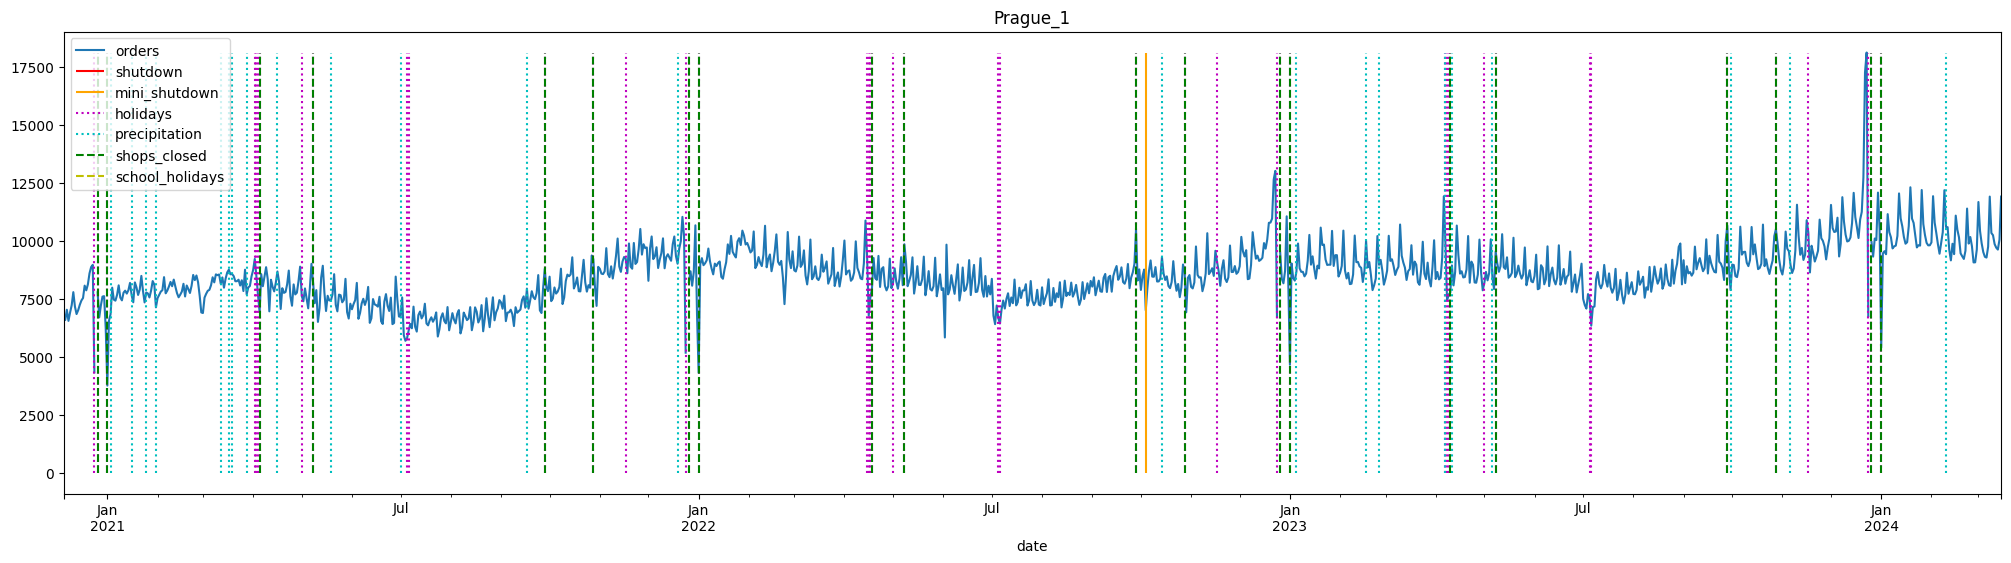

DatetimeIndex(['2022-11-22'], dtype='datetime64[ns]', name='date', freq='D')
DatetimeIndex(['2022-10-04'], dtype='datetime64[ns]', name='date', freq='D')


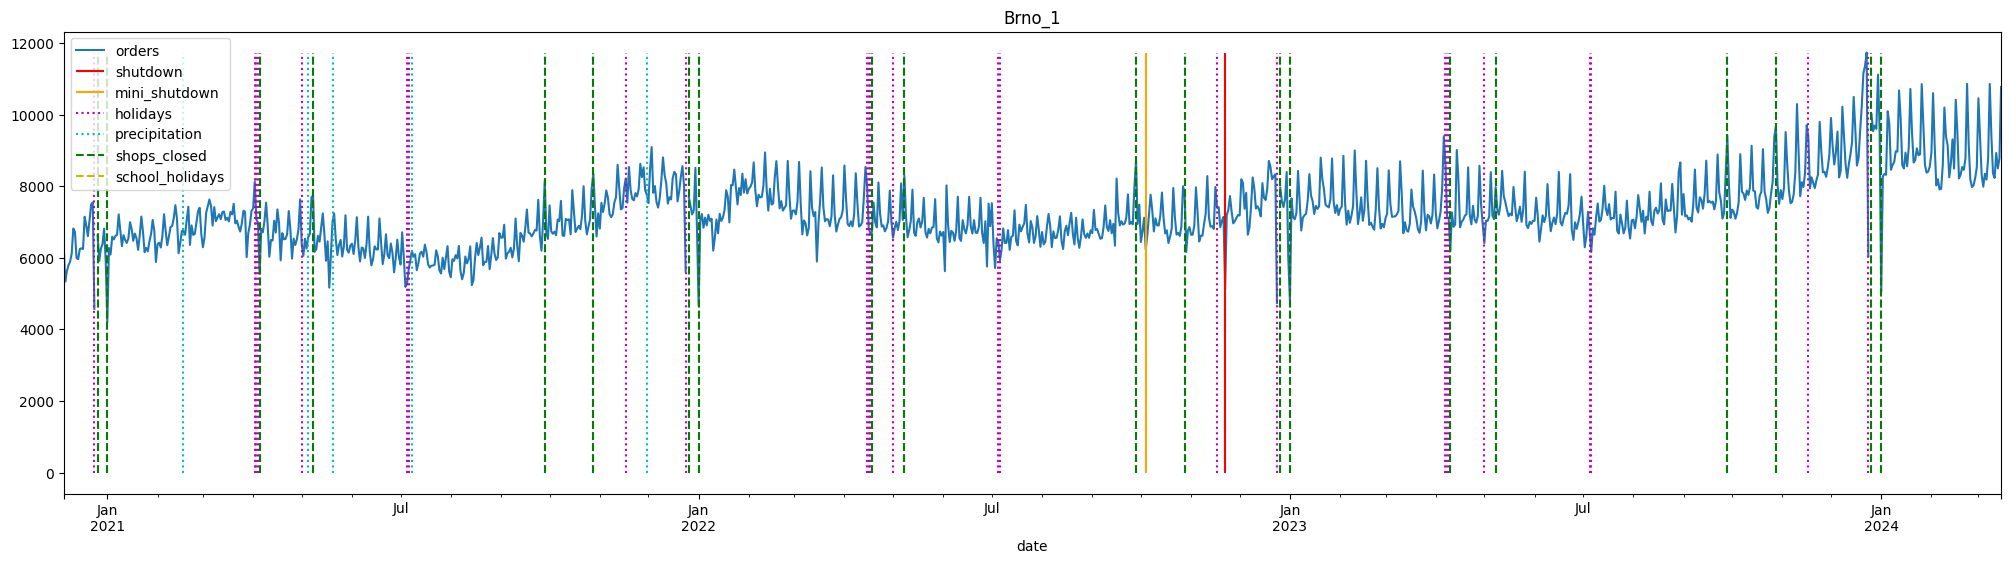

DatetimeIndex([], dtype='datetime64[ns]', name='date', freq='D')
DatetimeIndex(['2022-10-04'], dtype='datetime64[ns]', name='date', freq='D')


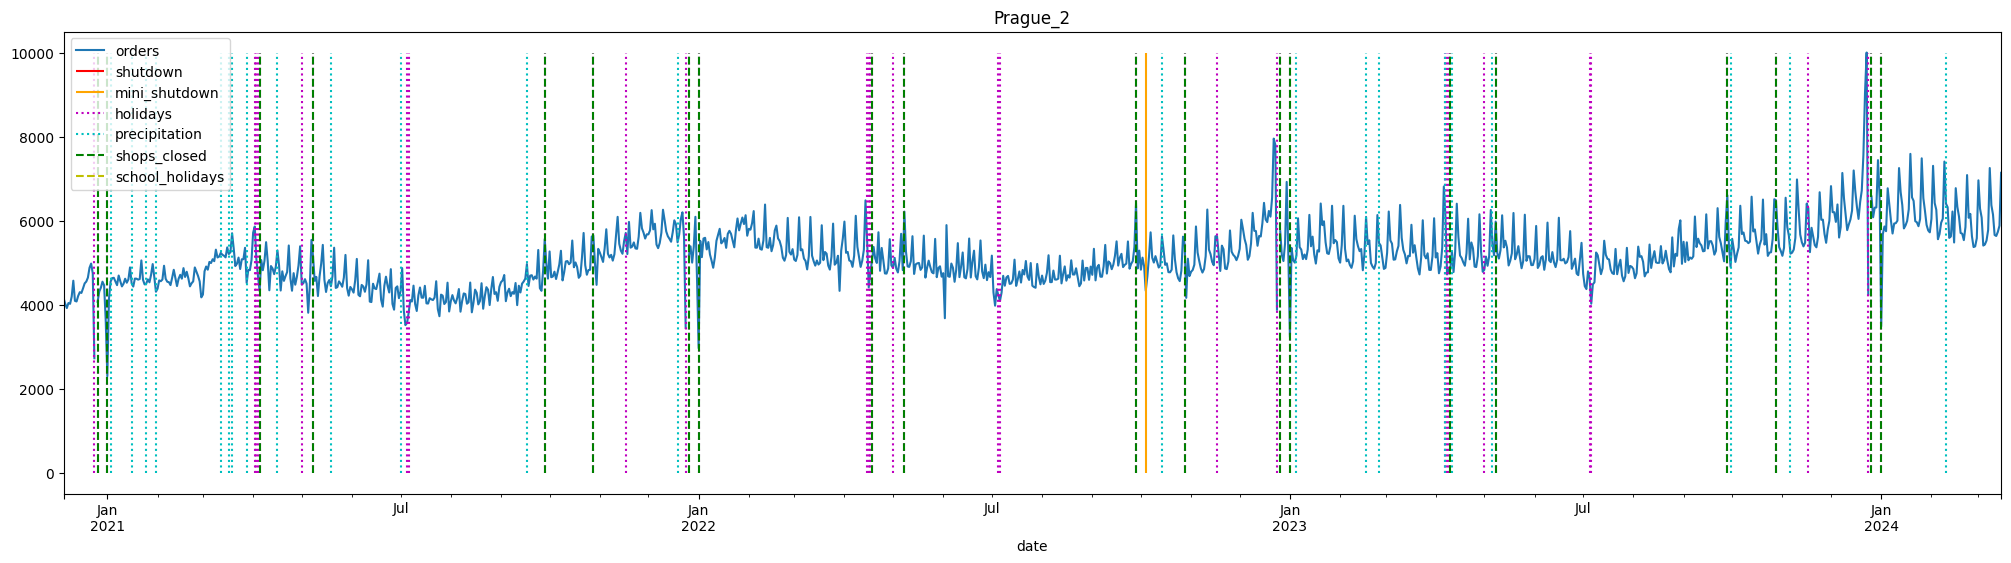

DatetimeIndex([], dtype='datetime64[ns]', name='date', freq='D')
DatetimeIndex(['2022-10-04'], dtype='datetime64[ns]', name='date', freq='D')


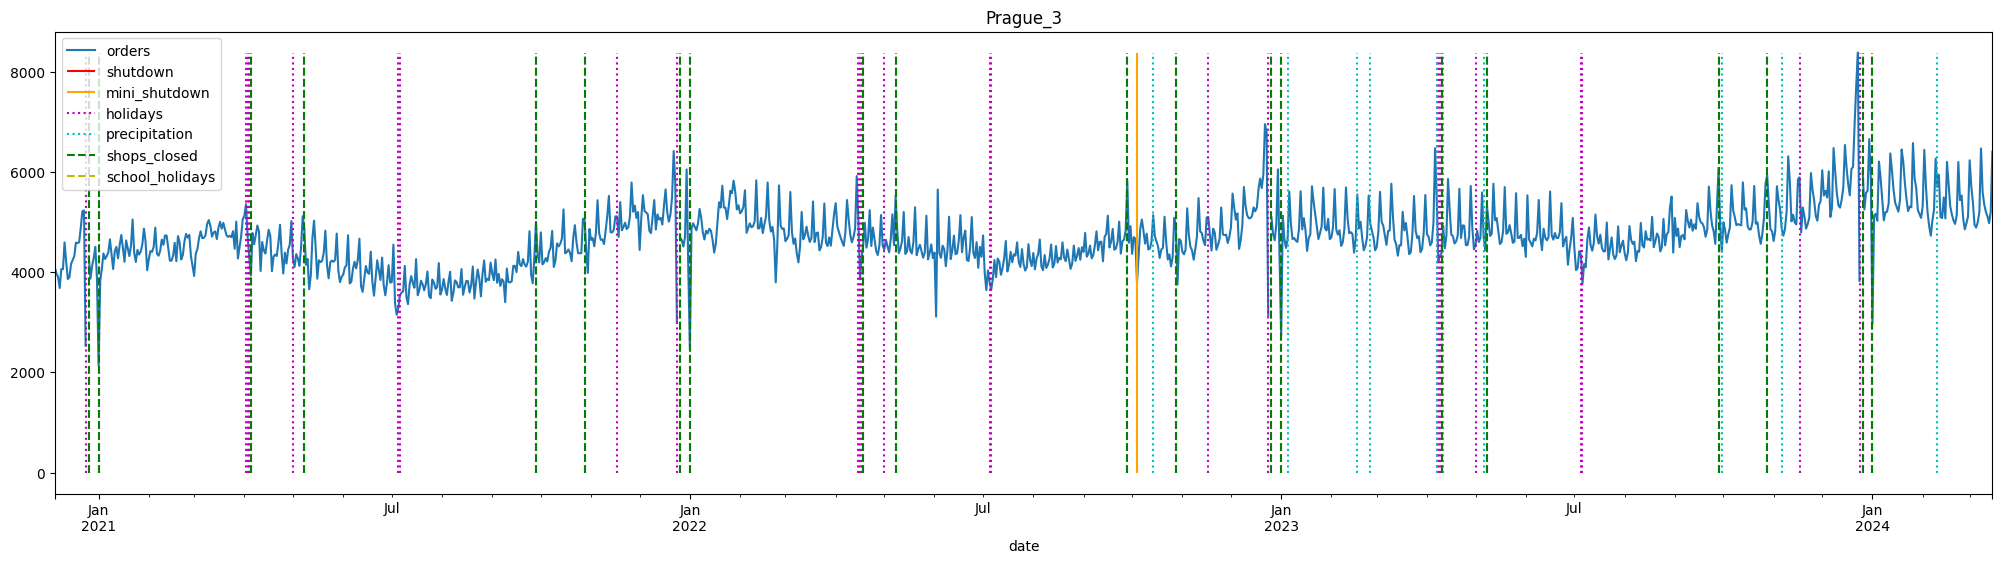

DatetimeIndex([], dtype='datetime64[ns]', name='date', freq='D')
DatetimeIndex([], dtype='datetime64[ns]', name='date', freq='D')


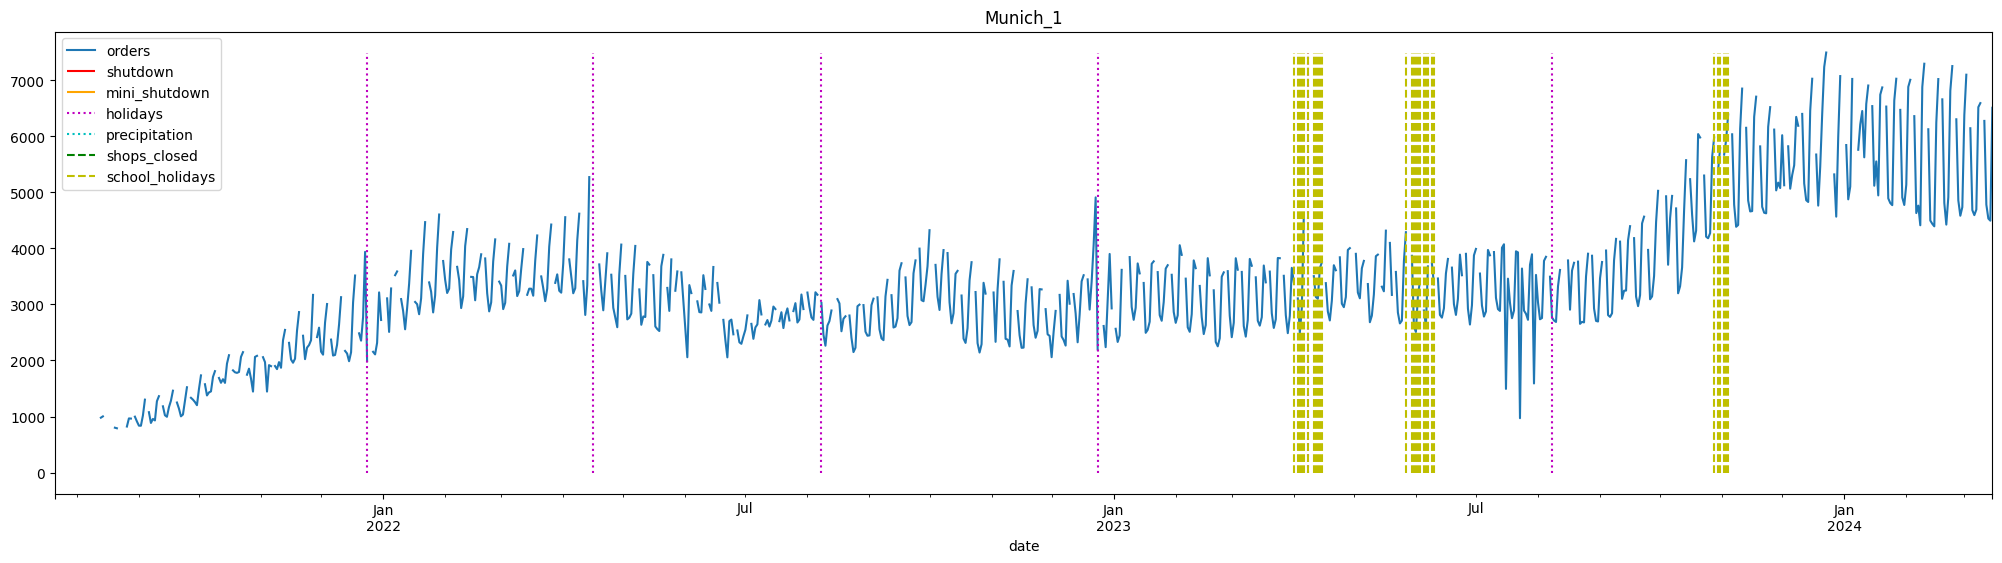

DatetimeIndex([], dtype='datetime64[ns]', name='date', freq='D')
DatetimeIndex([], dtype='datetime64[ns]', name='date', freq='D')


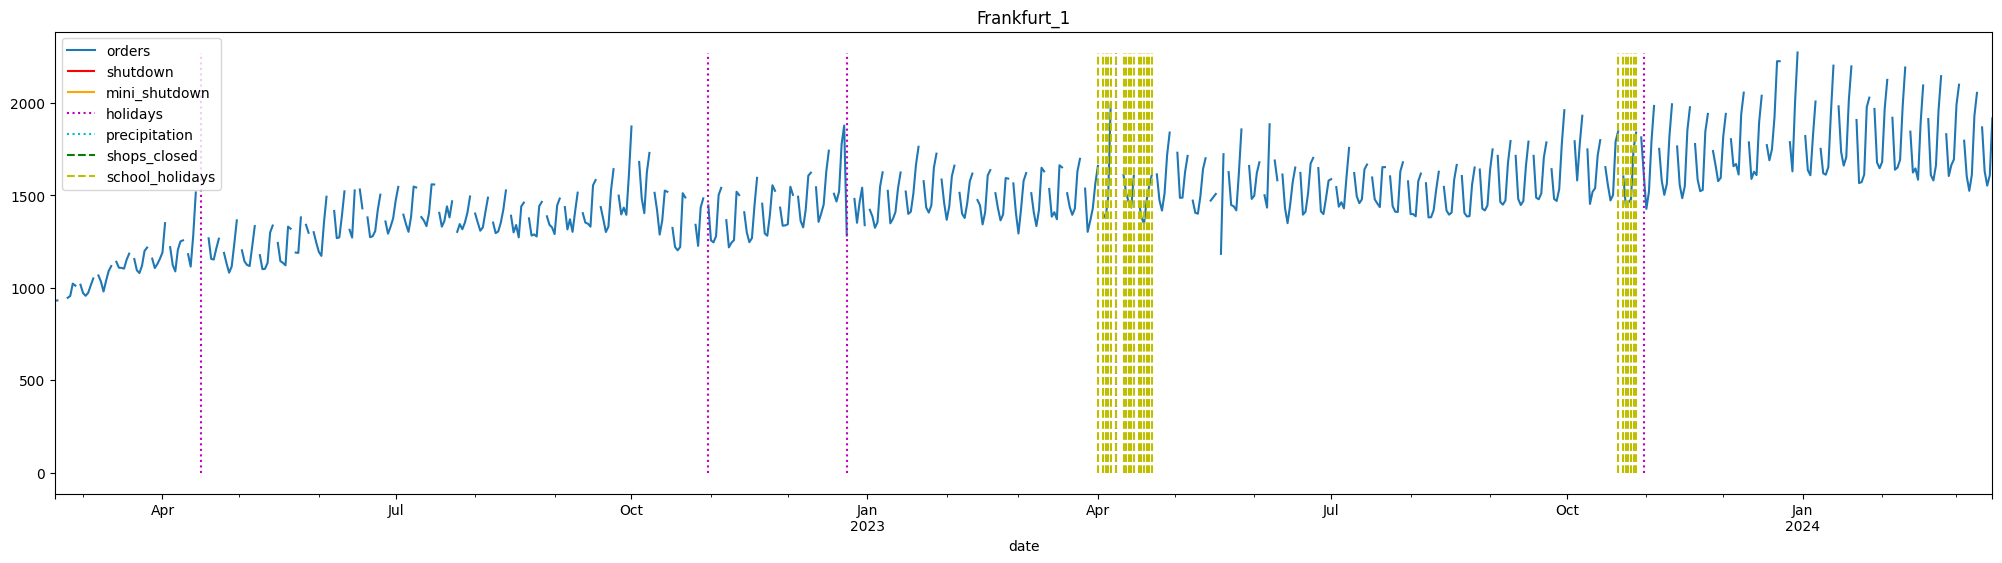

DatetimeIndex([], dtype='datetime64[ns]', name='date', freq='D')
DatetimeIndex([], dtype='datetime64[ns]', name='date', freq='D')


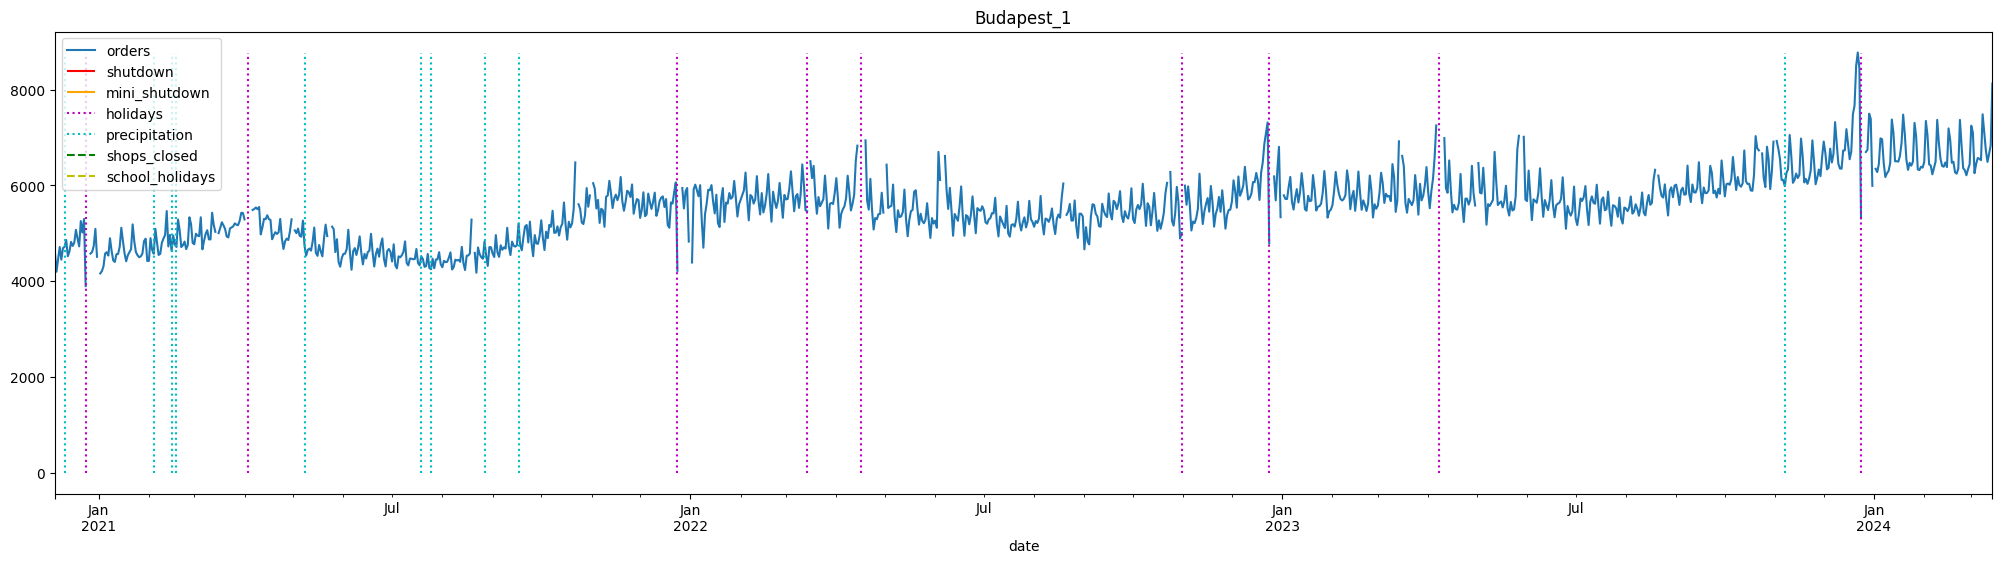

In [12]:
for warehouse in df.warehouse.unique():
    plot_ts(warehouse, df)

<Axes: xlabel='date'>

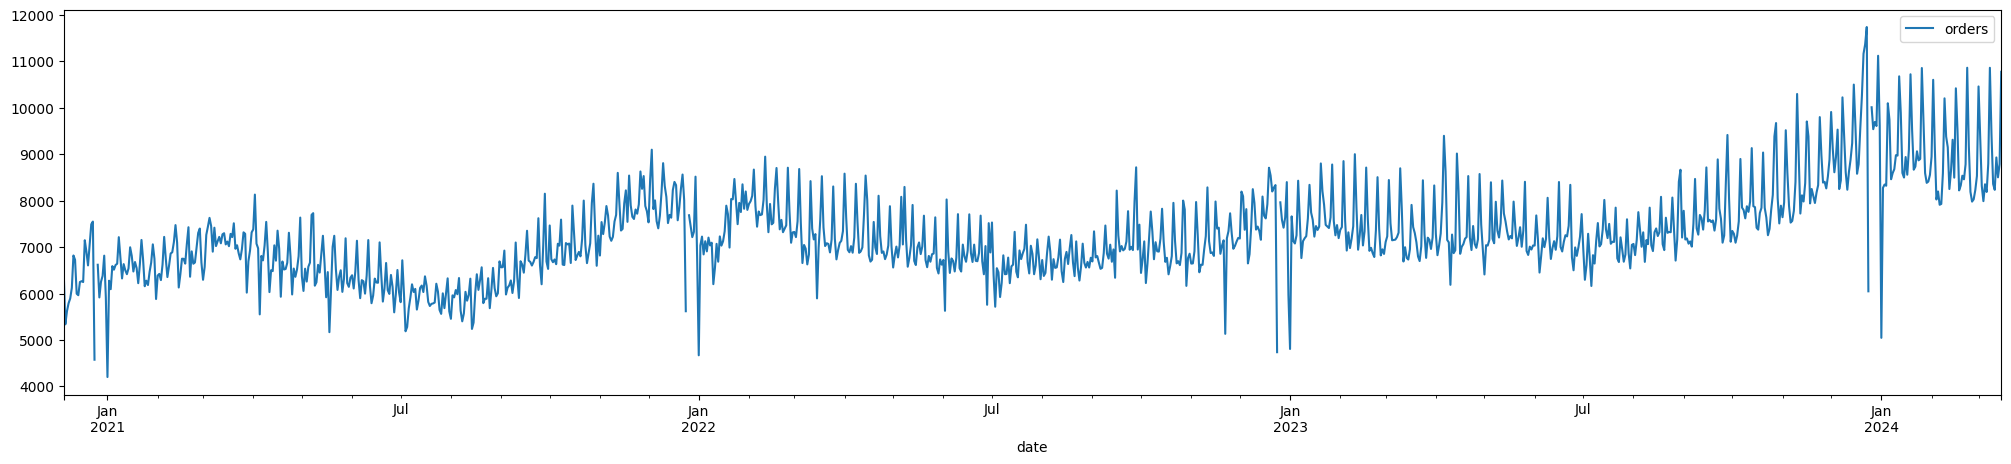

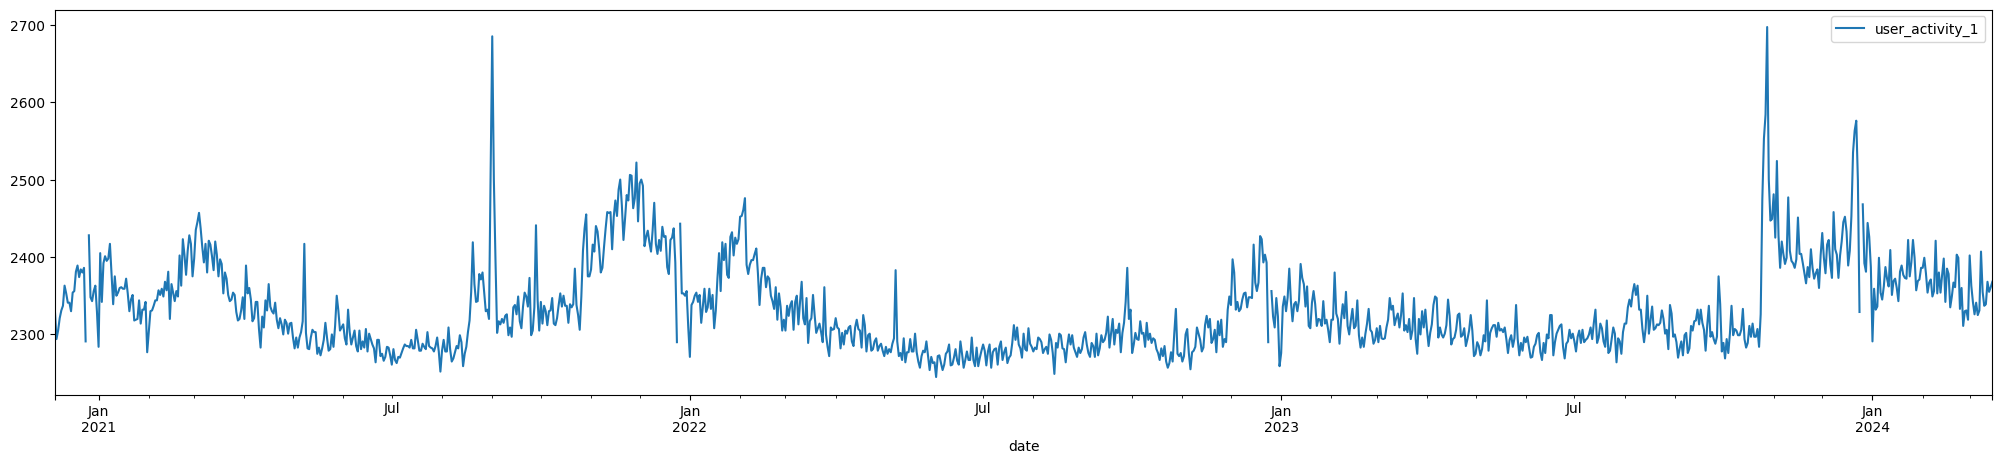

In [13]:
warehouse = "Brno_1"
df1 = df.query('warehouse == "{}"'.format(warehouse))
# assign date as the index and then fill the missing date, create a column to indicate the missing date
df1 = df1.set_index('date').asfreq('D')
df1['missing'] = df1['warehouse'].isnull().astype(int)
df1.plot(y='orders', figsize=(25, 5))
df1.plot(y='user_activity_1', figsize=(25, 5))


In [14]:
df1.query('missing == 1').head(5)

,warehouse,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id,missing
date,,,,,,,,,,,,,,,,,,
2020-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2021-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2022-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2023-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
